# 1) Prepare a classification model using Naive Bayes for salary data 

## Data Description:

##### age -- age of a person
##### workclass	-- A work class is a grouping of work 
##### education	-- Education of an individuals	
##### maritalstatus -- Marital status of an individulas	
##### occupation	 -- occupation of an individuals
##### relationship -- 	
##### race --  Race of an Individual
##### sex --  Gender of an Individual
##### capitalgain --  profit received from the sale of an investment	
##### capitalloss	-- A decrease in the value of a capital asset
##### hoursperweek -- number of hours work per week	
##### native -- Native of an individual
##### Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (150)
import seaborn as sns
sns.set_theme(style='darkgrid',palette='viridis')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
test = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Naive%20Bayes/SalaryData_Test.csv')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Naive%20Bayes/SalaryData_Train.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
test.describe()


,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Data Visualization of train-dataset

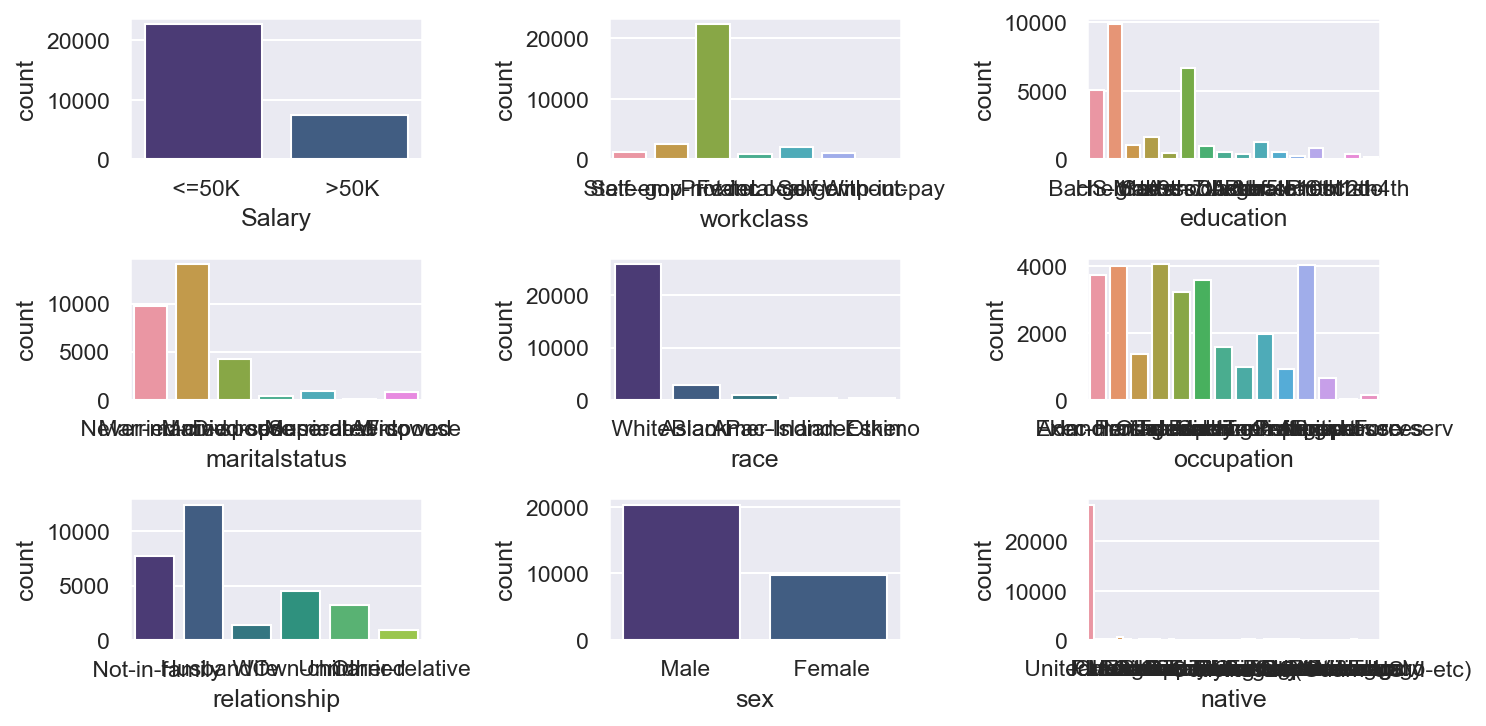

In [10]:
plt.subplot(3,3,1)
sns.countplot(train['Salary'])

plt.subplot(3,3,2)
sns.countplot(train['workclass'])

plt.subplot(3,3,3)
sns.countplot(train['education'])

plt.subplot(3,3,4)
sns.countplot(train['maritalstatus'])

plt.subplot(3,3,5)
sns.countplot(train['race'])


plt.subplot(3,3,6)
sns.countplot(train['occupation'])

plt.subplot(3,3,7)
sns.countplot(train['relationship'])

plt.subplot(3,3,8)
sns.countplot(train['sex'])

plt.subplot(3,3,9)
sns.countplot(train['native'])

plt.rcParams['figure.figsize'] = (25,20)
plt.rcParams['figure.dpi'] = (250)
plt.hsv()

plt.tight_layout()

# Data Visualization of test-dataset

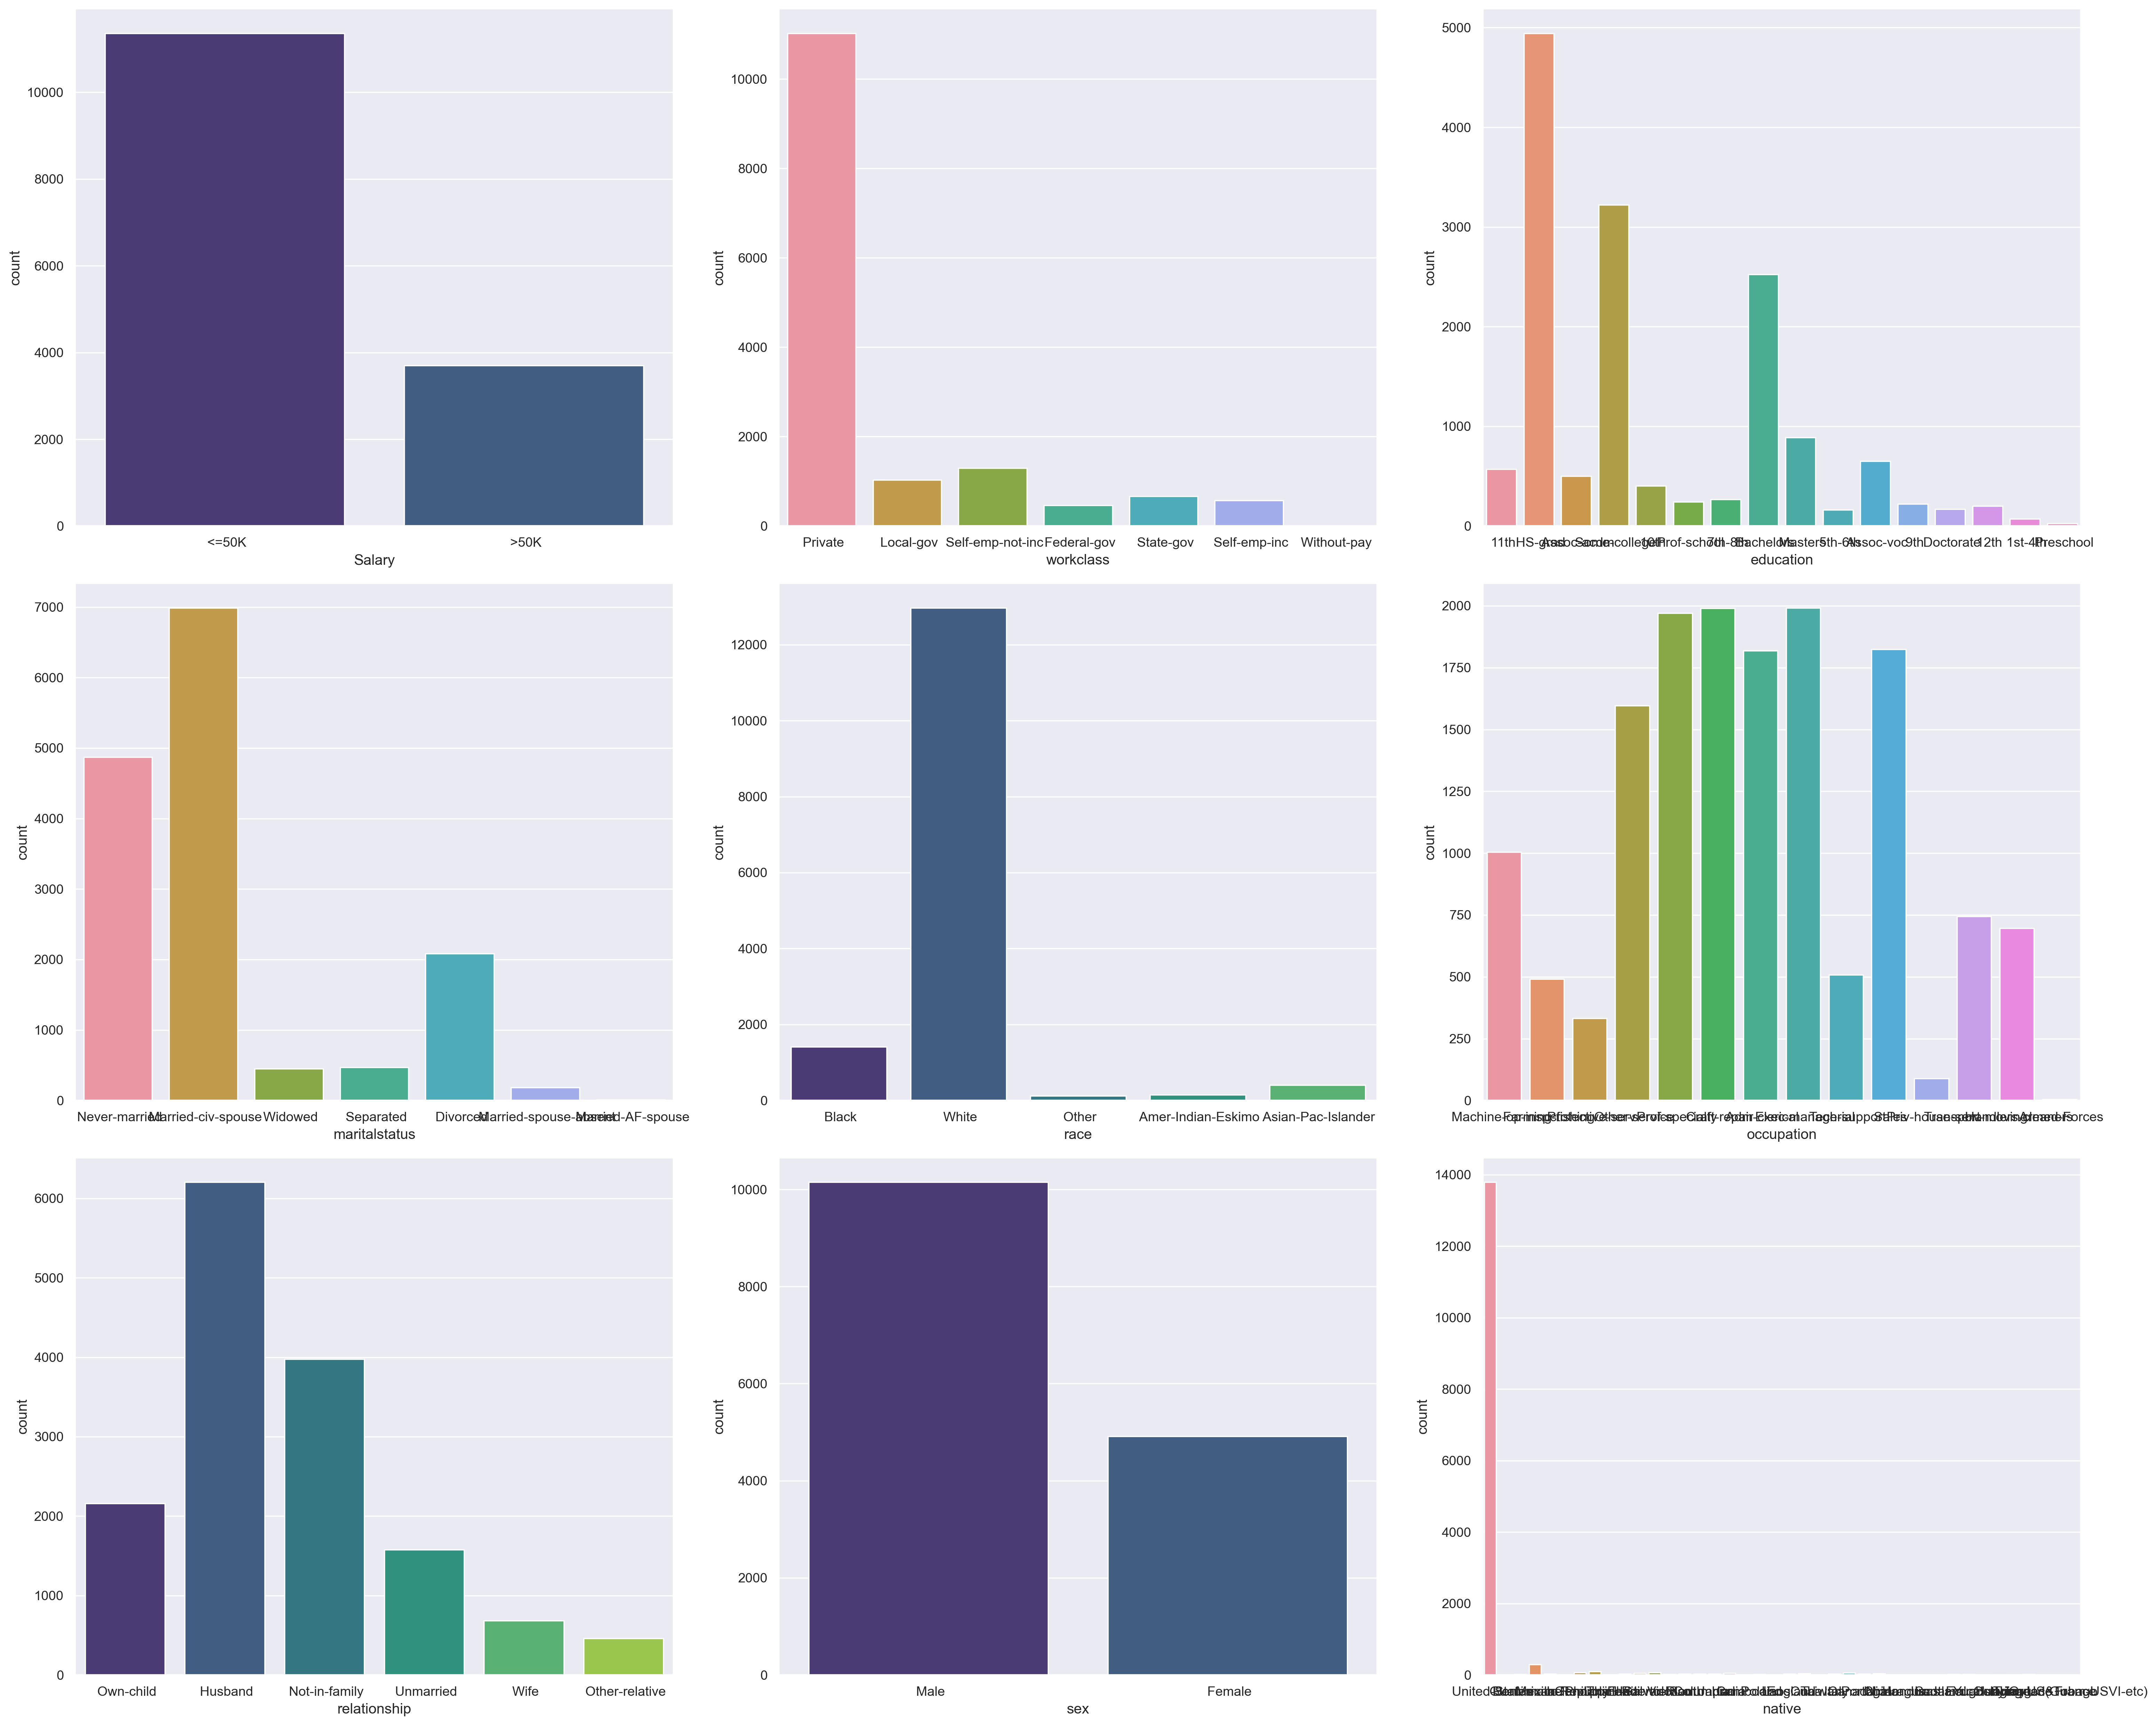

In [11]:
plt.subplot(3,3,1)
sns.countplot(test['Salary'])

plt.subplot(3,3,2)
sns.countplot(test['workclass'])

plt.subplot(3,3,3)
sns.countplot(test['education'])

plt.subplot(3,3,4)
sns.countplot(test['maritalstatus'])

plt.subplot(3,3,5)
sns.countplot(test['race'])


plt.subplot(3,3,6)
sns.countplot(test['occupation'])

plt.subplot(3,3,7)
sns.countplot(test['relationship'])

plt.subplot(3,3,8)
sns.countplot(test['sex'])

plt.subplot(3,3,9)
sns.countplot(test['native'])

plt.rcParams['figure.figsize'] = (25,20)
plt.rcParams['figure.dpi'] = (250)
plt.hsv()

plt.tight_layout()

# Encoding Training & Testing dataset

In [12]:
oe = OrdinalEncoder()

In [13]:
cat_col = train.select_dtypes(object).columns
cat_col

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [14]:
train[cat_col] = oe.fit_transform(train[cat_col])
train.head(5)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5.0,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,37.0,0.0
1,50,4.0,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0,0.0
2,38,2.0,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0,0.0
3,53,2.0,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0,0.0
4,28,2.0,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0


In [15]:
cat_col = test.select_dtypes(object).columns
cat_col

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [16]:
test[cat_col] = oe.fit_transform(test[cat_col])
test.head(5)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2.0,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,37.0,0.0
1,38,2.0,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,37.0,0.0
2,28,1.0,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,37.0,1.0
3,44,2.0,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,37.0,1.0
4,34,2.0,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,37.0,0.0


# Spliting Data into train,test

In [17]:
xtrain = train.iloc[:,:-1]
ytrain = train['Salary']

In [18]:
xtest = test.iloc[:,:-1]
ytest = test['Salary']

# Model Buliding

In [20]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
yp = nb.predict(xtest)

In [21]:
print(f"Train Accuracy:{nb.score(xtrain,ytrain)}\n Test Accuracy:{nb.score(xtest,ytest)}")

Train Accuracy:0.7729186698053778
 Test Accuracy:0.7749667994687915


# With 77.49% we can say this is Generalize Model